# Mini Project 3

**2025 Introduction to Quantitative Methods in Finance**

**The Erdös Institute**

The code below provides a visual representation of how the Black-Scholes **call option** price changes with respect to time.

**a)** Use the visualization to interpret how the *rate of change* of the Black-Scholes call option price behaves as time progresses.

**b)** Create a separate graphic to visualize how the *rate of change* of the Black-Scholes call option price depends on the spot price $S(0)$.

**c)** Repeat parts **a** and **b** for **put option** prices.

**d)** Use the space below to record your observations and reflections based on the generated plots.

---

### Observations:

- *Call Option – Time Sensitivity:*  
- *Call Option – Spot Price Sensitivity:*  
- *Put Option – Time Sensitivity:*  
- *Put Option – Spot Price Sensitivity:*  

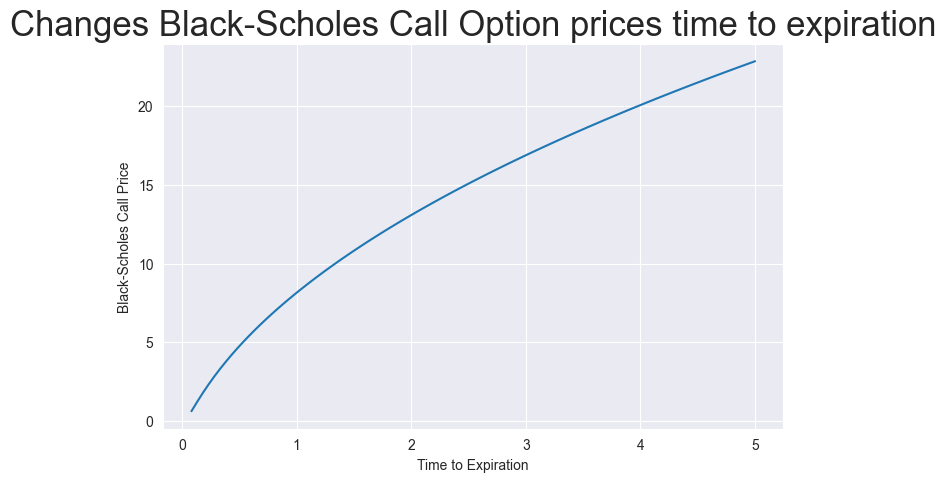

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)


S0 = 100
K = 110
sigma = .3
numtimes = 100
times = np.linspace(1/12, 5, numtimes)


call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]

plt.figure(figsize = (8,5))
plt.title('Changes Black-Scholes Call Option prices time to expiration', size = 25)
plt.plot(times, call_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()

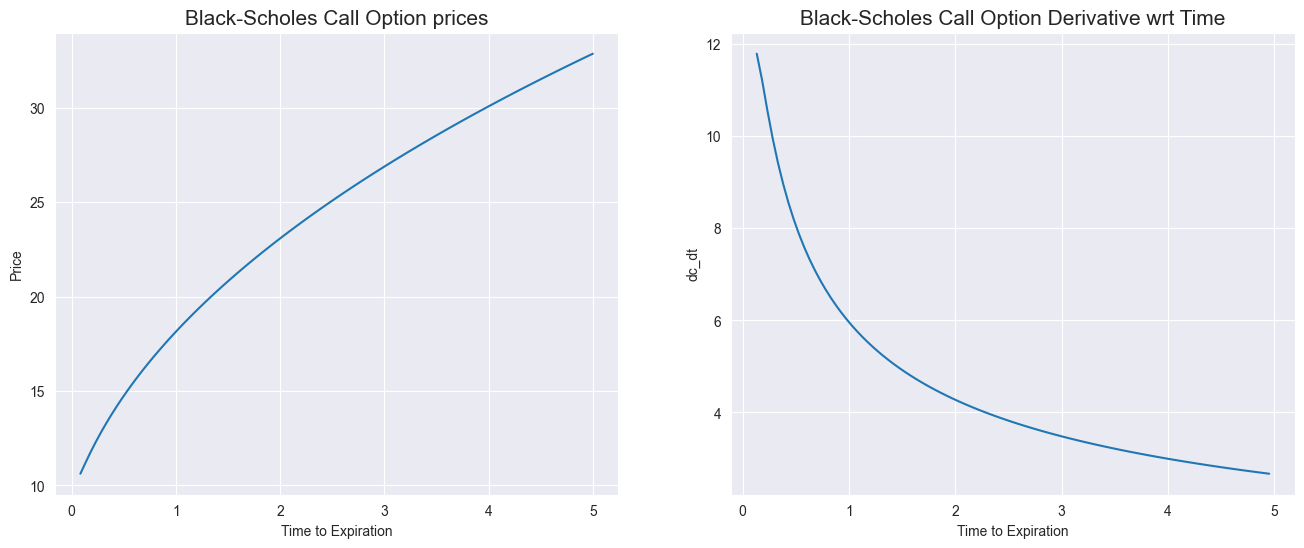

In [40]:
#(a) Use the visualization to interpret how the *rate of change* of the Black-Scholes call option price behaves as time progresses.
# We will calculate the derivative of the Black-Scholes price with respect to time: this is known as Theta.

S0 = 110
K = 100
sigma = .3

tte = 5
te = 1/12
numtimes = 100
dt = (tte - te) / numtimes
times = np.linspace(te, tte, numtimes)

call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]

#calculate 2nd order central finite difference (calculate only in the interior)
times_trunc = [times[i] for i in range(1,len(times)-1) ]
dc_dt = [(call_prices[i+1] - call_prices[i-1])/(2*dt) for i in range(1,len(times)-1) ]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].plot(times,call_prices)
axes[1].plot(times_trunc, dc_dt)

axes[0].set_title('Black-Scholes Call Option prices', size = 15)
axes[0].set_xlabel('Time to Expiration')
axes[0].set_ylabel('Price')

axes[1].set_title('Black-Scholes Call Option Derivative wrt Time', size = 15)
axes[1].set_xlabel('Time to Expiration')
axes[1].set_ylabel('dc_dt')

plt.show()

Conclusion: The price of a call option priced by the Black-Scholes model will decrease in an accelerating manner as the time approaches expiration. This is known as "theta decay" and is a key component to the profitability of selling options.

This behavior was seen for various strike prices and values of volatility. 

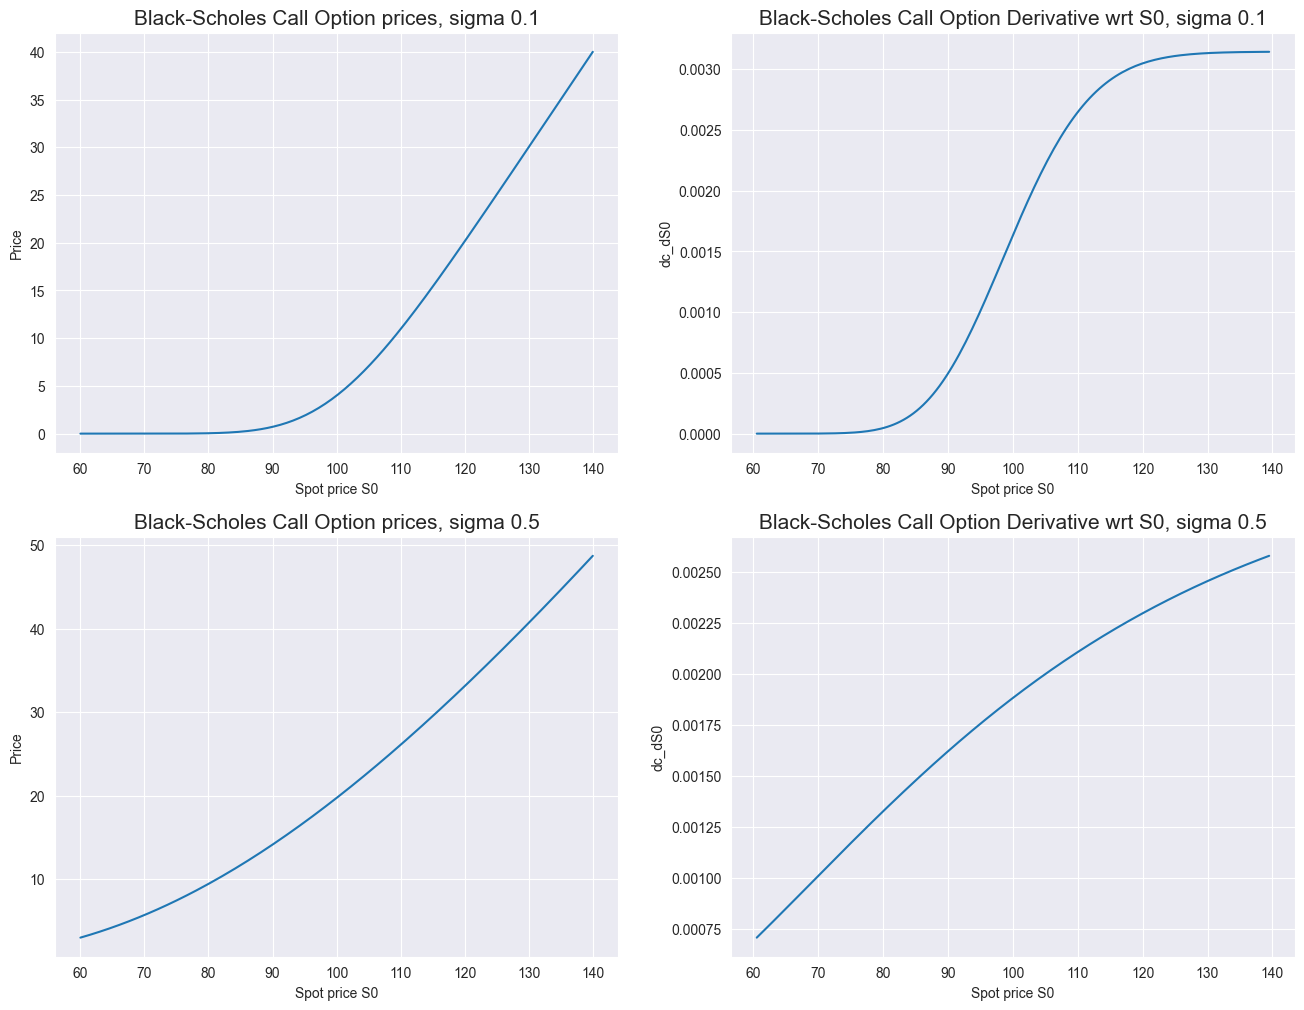

In [4]:
#(b) Create a separate graphic to visualize how the *rate of change* of the Black-Scholes call option price depends on the spot price $S(0)$.
#Will examine two different volatilities.

S0_min = 60
S0_max = 140
numSpots = 2*(S0_max - S0_min)
S0 = np.linspace(S0_min, S0_max, numSpots) 
K = 100
sigma = 0.1
sigma2 = 0.5
tte = 1

call_prices = [bs_call(S0[i], K,sigma, tte) for i in range(len(S0))]
call_prices2 = [bs_call(S0[i], K,sigma2, tte) for i in range(len(S0))]

#calculate 2nd order central finite difference (calculate only in the interior)
S0_trunc = [S0[i] for i in range(1,len(S0)-1) ]
dc_dS0 = [(call_prices[i+1] - call_prices[i-1])/(2*numSpots) for i in range(1,len(S0)-1) ]
dc_dS0_2 = [(call_prices2[i+1] - call_prices2[i-1])/(2*numSpots) for i in range(1,len(S0)-1) ]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes[0,0].plot(S0,call_prices)
axes[0,1].plot(S0_trunc, dc_dS0)
axes[1,0].plot(S0, call_prices2)
axes[1,1].plot(S0_trunc, dc_dS0_2)


axes[0,0].set_title('Black-Scholes Call Option prices, sigma 0.1', size = 15)
axes[0,0].set_xlabel('Spot price S0')
axes[0,0].set_ylabel('Price')

axes[0,1].set_title('Black-Scholes Call Option Derivative wrt S0, sigma 0.1', size = 15)
axes[0,1].set_xlabel('Spot price S0')
axes[0,1].set_ylabel('dc_dS0')

axes[1,0].set_title('Black-Scholes Call Option prices, sigma 0.5', size = 15)
axes[1,0].set_xlabel('Spot price S0')
axes[1,0].set_ylabel('Price')

axes[1,1].set_title('Black-Scholes Call Option Derivative wrt S0, sigma 0.5', size = 15)
axes[1,1].set_xlabel('Spot price S0')
axes[1,1].set_ylabel('dc_dS0')

plt.show()

Conclusion: The price of a call option naturally depends on the spot price. As the spot price increases, the price of the option increases. 

When the spot price is out the money (below the strike price), the option price remains low, then increases nearly linearly with respect to the spot price as the option goes in the money. This can be seen in the lower volatility chart (sigma 0.1). The pattern is reminiscent of the ReLU activation function used in neural networks, which is itself akin to the output of a transistor. In this case, the derivative of the option price with respect to S0 is sigmoid shaped.

As the volatility increases (see sigma 0.5 chart), the option price with respect to the spot price S0 approaches a linear relation.

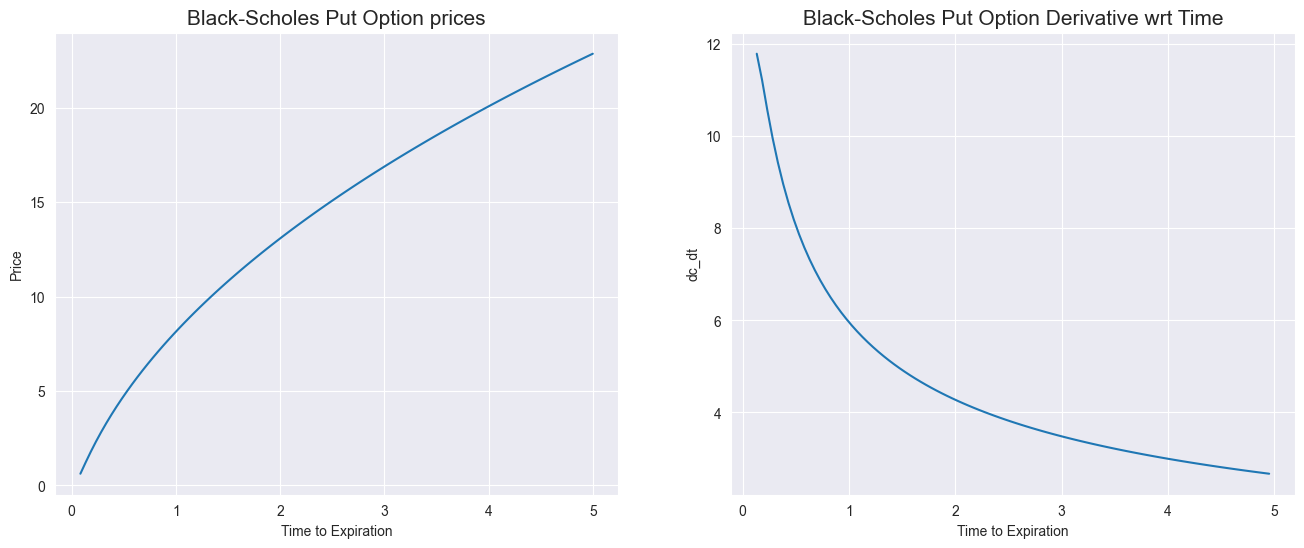

In [59]:
# (c) Repeat parts (a) and (b) for **put option** prices.

#(a) Use the visualization to interpret how the *rate of change* of the Black-Scholes put option price behaves as time progresses.
# We will calculate the derivative of the Black-Scholes price with respect to time: this is known as Theta.

S0 = 110
K = 100
sigma = .3

tte = 5
te = 1/12
numtimes = 100
dt = (tte - te) / numtimes
times = np.linspace(te, tte, numtimes)

put_prices = [bs_put(S0,K,sigma, t = times[i]) for i in range(len(times))]

#calculate 2nd order central finite difference (calculate only in the interior)
times_trunc = [times[i] for i in range(1,len(times)-1) ]
dc_dt = [(put_prices[i+1] - put_prices[i-1])/(2*dt) for i in range(1,len(times)-1) ]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].plot(times,put_prices)
axes[1].plot(times_trunc, dc_dt)

axes[0].set_title('Black-Scholes Put Option prices', size = 15)
axes[0].set_xlabel('Time to Expiration')
axes[0].set_ylabel('Price')

axes[1].set_title('Black-Scholes Put Option Derivative wrt Time', size = 15)
axes[1].set_xlabel('Time to Expiration')
axes[1].set_ylabel('dc_dt')

plt.show()

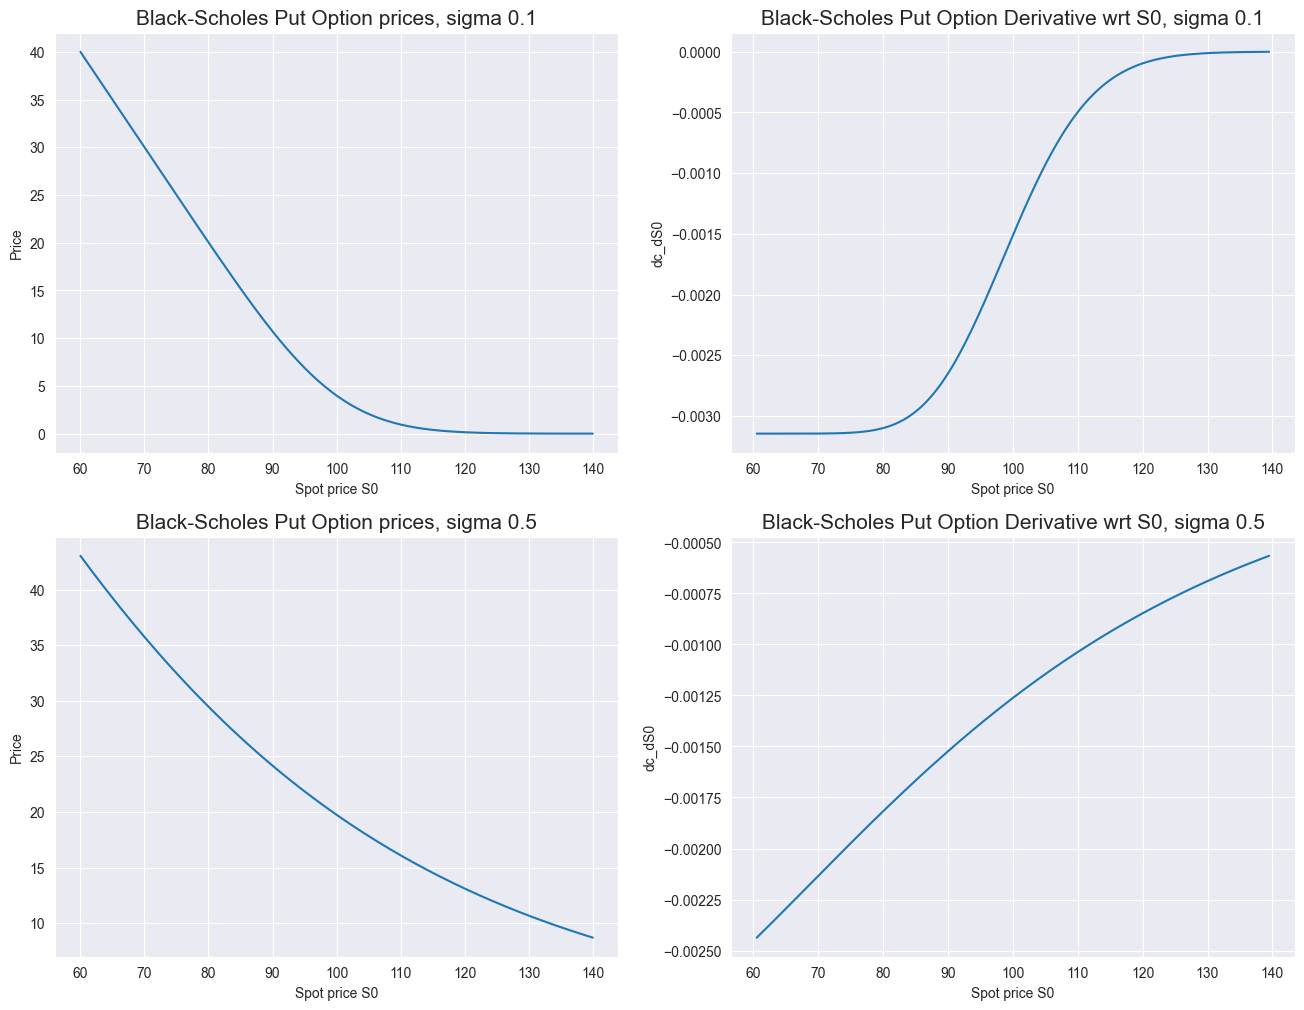

In [60]:
#(c) -(b) Create a separate graphic to visualize how the *rate of change* of the Black-Scholes put option price depends on the spot price $S(0)$.
#Will examine two different volatilities.

S0_min = 60
S0_max = 140
numSpots = 2*(S0_max - S0_min)
S0 = np.linspace(S0_min, S0_max, numSpots) 
K = 100
sigma = 0.1
sigma2 = 0.5
tte = 1

put_prices = [bs_put(S0[i], K,sigma, tte) for i in range(len(S0))]
put_prices2 = [bs_put(S0[i], K,sigma2, tte) for i in range(len(S0))]

#calculate 2nd order central finite difference (calculate only in the interior)
S0_trunc = [S0[i] for i in range(1,len(S0)-1) ]
dc_dS0 = [(put_prices[i+1] - put_prices[i-1])/(2*numSpots) for i in range(1,len(S0)-1) ]
dc_dS0_2 = [(put_prices2[i+1] - put_prices2[i-1])/(2*numSpots) for i in range(1,len(S0)-1) ]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes[0,0].plot(S0,put_prices)
axes[0,1].plot(S0_trunc, dc_dS0)
axes[1,0].plot(S0, put_prices2)
axes[1,1].plot(S0_trunc, dc_dS0_2)


axes[0,0].set_title('Black-Scholes Put Option prices, sigma 0.1', size = 15)
axes[0,0].set_xlabel('Spot price S0')
axes[0,0].set_ylabel('Price')

axes[0,1].set_title('Black-Scholes Put Option Derivative wrt S0, sigma 0.1', size = 15)
axes[0,1].set_xlabel('Spot price S0')
axes[0,1].set_ylabel('dc_dS0')

axes[1,0].set_title('Black-Scholes Put Option prices, sigma 0.5', size = 15)
axes[1,0].set_xlabel('Spot price S0')
axes[1,0].set_ylabel('Price')

axes[1,1].set_title('Black-Scholes Put Option Derivative wrt S0, sigma 0.5', size = 15)
axes[1,1].set_xlabel('Spot price S0')
axes[1,1].set_ylabel('dc_dS0')

plt.show()

Conclusion: The theta of put options (derivative of options price wrt to time) is equal to that of an equivalent call option in the Black-Scholes model.

The relationship of the put option price with respect to spot price is an x-axis reflection of the call price across the strike price. Derivatives with respect to S0 are shifted downward below the y-axis to provide a negative relation.

(d) Use the space below to record your observations and reflections based on the generated plots.

When purchasing options, one must be aware of the rapid decay in value with respect to time. 
If you are buying short term options, you should be convinced that the underlying stock is about to make a substantial move.

It is interesting how the theory of options pricing provides price graphs similar in character to that of ML activations functions and physical transistors. In my opinion, alignment with natural phenomena is a plus for any model.



